# Deep learning, c'est quoi?

Pour faire fonctionner ce notebook sur sa machine :
* Télécharger et installer anacodna https://www.anaconda.com/download/
* Aller dans le repertoire anaconda3/bin
* créer un environnement tensorflow `conda create -n tensorflow python=3.5` cf https://www.tensorflow.org/versions/r0.12/get_started/os_setup#anaconda_installation 
* activer l'environnement : `source activate tensorflow`, installer tensorflow `conda install -c conda-forge tensorflow`
* installer Keras `pip install keras` et matplotlib `pip install matplotlib`
* Dans l'interface d'anaconda <img src="anaconda.png"> installer et lancer jupyter notebook
* Télécharger et ouvrir ce notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

nb_classes = 10 #On doit reconnaitre 10 chiffres différents

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print ('Apprentissage : ', training_images.shape[0])
print ('Test : ', test_images.shape[0])

Using TensorFlow backend.


11493376/11490434 [==============================] - 6s 0us/step
Apprentissage :  60000
Test :  10000


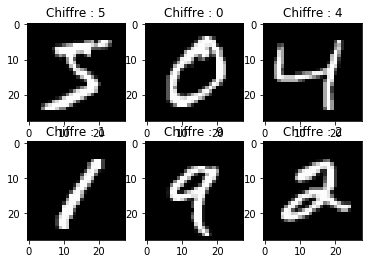

In [2]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(training_images[i], cmap='gray', interpolation='none')
    plt.title("Chiffre : {}".format(training_labels[i]))

In [3]:
training_images = training_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
training_images = training_images.astype('float32')
test_images = test_images.astype('float32')
training_images /= 255
test_images /= 255

training_labels_categories = np_utils.to_categorical(training_labels, nb_classes)
test_labels_categories = np_utils.to_categorical(test_labels, nb_classes)

In [4]:
model = Sequential()
model.add(Dense(500, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(0.5), metrics=['accuracy'])

history = model.fit(training_images, training_labels_categories, batch_size=500, nb_epoch=1,
                    verbose=1, validation_data=(test_images, test_labels_categories))
score = model.evaluate(test_images, test_labels_categories, verbose=0)
print('Score sur le dataset de test:', score[1]*100, "%")

/Users/m.zaborowski/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 3s 57us/step - loss: 0.4584 - acc: 0.8618 - val_loss: 0.2463 - val_acc: 0.9283
Score sur le dataset de test: 92.83 %


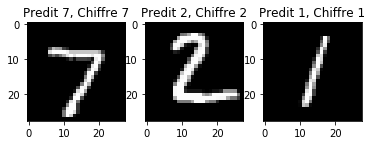

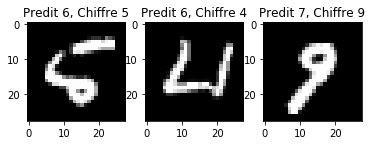

In [5]:
classes_predites = model.predict_classes(test_images)
correct_indices = np.nonzero(classes_predites == test_labels)[0]
incorrect_indices = np.nonzero(classes_predites != test_labels)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:3]):
    plt.subplot(1,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predit {}, Chiffre {}".format(classes_predites[correct], test_labels[correct]))

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:3]):
    plt.subplot(1,3,i+1)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predit {}, Chiffre {}".format(classes_predites[incorrect], test_labels[incorrect]))